### PA602/PA2605/PA2606: Intermediate Climate Science

#### First a recap of the self study exersise: The Zero Dimensional Energy Balance Model experiment to explore the effects of albedo and emissivity on effective temperature.
#### first recall our model:
# $ T_{eff} = (\frac{S(1-\alpha)}{4\epsilon\sigma})^{0.25}$

### The results should have looked like this:

![self study result](img/self_study_result.png)

### What can we infer from this figure?

# Computer Workshop 2, Exersise 1

#### Exersise Objectives:
1. Introduce you the time variant zero dimensional energy balance model.
2. Go through the workflow of setting up a simple model.
3. Discuss how we can approach time stepping in models.
4. Run a series of experiments to examine the sensitivity of the climate to CO2

#### Python Libraries
For this exersises we will work with the following python libraries:
1. **NumPy** (https://numpy.org/): _"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much .
2. **Matplotlib** (https://matplotlib.org/): _"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible"_. We will use this library to visualise the contents of data files and the results from the analyses we perform on these data.

## The Time Dependent Zero Dimensional Energy Balance Model
Starting from our original model of Arriving Shrotwave radiation ($ASR$) and Outgoing Longwave Radiation ($OLR$):
## $ASR = OLR$
The simplest model we can make for energy balance assumes the rate of temperature change is proportional to the imposed energy imbalance:
## $C\frac{dT}{dt} = ASR - OLR$
Where $C$ is the heat capacity in the system, $\frac{dT}{dt}$ is the rate of change in the temperature. In oder to solve this using Python, we can replace the differentials in our model with the **finite differences** thus:
## $C\frac{\Delta T}{\Delta t} \approx ASR - OLR$
where $\Delta T = T_{n+1} - T_{n}$ and $\Delta t = t_{n+1} - t_{n}.$
### Assumptions:
- We are always dealing with discrete quantites.
- we can approximate the derivative $\frac{\Delta T}{\Delta t}$ such that the time step $\Delta t$ is valid and useful.

## Time stepping within the model
Now we take the next step to establish how we can calculate future temperatures. Our starting point is our current definition of the model:
## $C\frac{T_{n+1} - T_{n}}{\Delta t} = ASR - OLR$
The approach we are taking to define the time and temperature interval changes is known as **discretization**. This allows us to rearrange and solve for the **future** temperature:
## $T_{n+1} = T_{n} + \frac{\Delta t}{C}(ASR - OLR(T_{n}))$
where $\Delta t$ is known as the **timestep** and OLR uses the current temperature to calculate the future temperature. Here we are applying the **Forward Euler method** to solve for $T_{n+1}$. You will notice we have not reffered to the effective temperature here as we did with our non-time dependent version. We now will think of the temperature as the surface temperature. In our new model if $T_{n} < T_{eff}$ then the system should warm and if $T_{n} > T_{eff}$ then the system should cool. With that in mind lets begin constructuing our model.

### 1. Import Python libraries we need for this exersise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Define our functions for ASR and OLR

In [2]:
# define a function for outgoing longwave radiation (OLR)
def OLR(Ts, emiss):
    """ Calculate Outgoing Longwave Radiation (OLR)
    inputs: Ts    -> surface temperature (K)
            emiss -> emissivity (unitless)

    outputs: OLR -> outgoing longwave radiation (W/m^2)
    """
    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    sigma = 5.67e-8  # W m^-2 K^-4
    return emiss * sigma * (Ts**4)

In [3]:
# define a function for absorbed shortwave radiation (ASR)
def ASR(Q, alpha):
    """ Calculate Arriving Shortwave Radiation (ASR)
    inputs: Q     -> solar insolation (W/m^2)
            alpha -> albedo (unitless)
    
    outputs: ASR  -> arriving shortwave radiation (W/m^2)
    """
    return (1 - alpha) * Q

### 3. define our stepping function
#### Heat Capacity
The function below takes in the variables we need to calculate the surface temperature for the next time step. The one variable we still need consider, and is a constant in this model, is the value we use for the heat capacity ($C$).

In [4]:
# create a function to find the new temperature based on the previous using Euler's method
def step_forward(Q, Ts, alpha, emiss, dt):
    """ Apply Euler method to calculate new temperature based on previous time step.
    inputs: Q     -> solar insolation (W/m^2)
            Ts    -> surface temperature (K)
            alpha -> albedo (unitless)
            emiss -> emissivity (unitless)
            dt    -> time step (seconds)

    outputs: Ts   -> new surface temperaturein time step
    """
    c_w = 4E3  #  Specific heat of water in J/kg/K
    rho_w = 1E3  #  Density of water in kg/m3
    H = 100.   #  Depth of water in m
    C = c_w * rho_w * H   #  Heat capacity of the model

    
    return Ts + dt / C * ( ASR(Q, alpha) - OLR(Ts, emiss) )

In [5]:
# run ebm experiment
def run_time_dependent_zero_dim_ebm(Q, alpha, emiss, dt, numsteps,T0=288):
    """ Apply Euler method to calculate new temperature based on previous time step.
    inputs: Q     -> solar insolation (W/m^2)
            Ts    -> surface temperature (K)
            alpha -> albedo (unitless)
            emiss -> emissivity (unitless)
            dt    -> time step (seconds)

    outputs: Years  -> array holding experiment year number
             Tsteps -> array holding Ts for each time step (K)
    """
    
    # initialise arrays to hold results
    Tsteps = np.zeros(numsteps+1)
    Years = np.zeros(numsteps+1)
    # set the first value to be the temperature in balance using Zero Dim EBM
    # i.e. ASR = OLR, therfore Ts = (Q*(1-alpha)/(emiss*sigma))**0.25
    Tsteps[0] = T0

    # loop over each year and calculate new surface temperature
    for n in range(numsteps):
        Years[n+1] = n+1
        Tsteps[n+1] = step_forward(Q, Tsteps[n], alpha, emiss ,dt )

    return Years, Tsteps

Text(0.5, 1.0, '50 year EBM simulation for Earth starting at 288 K')

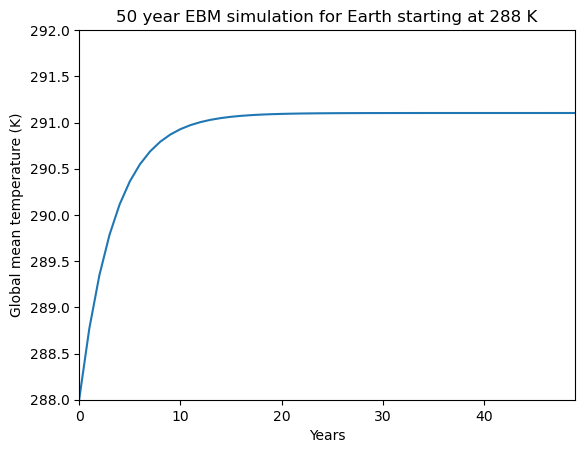

In [6]:
# define the time interval, currently one year expressed in seconds
dt = 60.0 * 60.0 * 24.0 * 365.0 # seconds in 1 year

# define albedo 
alpha = 0.32

# define emissivity
emiss = 0.57

# define solar insolation
Q = 341.3

# define number steps (e.g. number of years)
numsteps = 49

# dfine starting temperature
T0 = 288 # K

# run the experiment
Years, Tsteps = run_time_dependent_zero_dim_ebm(Q, alpha, emiss, dt, numsteps,T0)

# make a simple plot the results
plt.plot(Years, Tsteps)
plt.xlim(0,numsteps)
plt.ylim(np.floor(np.min(Tsteps)), np.ceil(np.max(Tsteps)))
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)')
plt.title(f"50 year EBM simulation for Earth starting at {T0} K")

## $C\frac{dT}{dt} = F_{ASR} - F_{OLR} + F_{CO2}$

In [7]:
def greenhouse_effect(CO2):
    """ calculate forcing due to atmospheric co2 concentrations relative to preindustrial (PI) level.
    input: CO2    -> concentration of co2 (ppmv)

    output: F_CO2 -> tendency of CO2 forcing (W/m^2)
    """
    # define preindustrial concentraion of CO2
    CO2_PI=280
    # define scaler
    a=5
    return a*np.log(CO2/CO2_PI) 

In [8]:
# create a function to find the new temperature based on the previous using Euler's method
def step_forward_V2(Q, Ts, alpha, emiss, dt, co2):
    """ Apply Euler method to calculate new temperature based on previous time step.
    inputs: Q     -> solar insolation (W/m^2)
            Ts    -> surface temperature (K)
            alpha -> albedo (unitless)
            emiss -> emissivity (unitless)
            dt    -> time step (seconds)

    outputs: Ts   -> new surface temperaturein time step

    UPDATES: In version 2 we will also account for atmospheric CO2 concentrations
    """
    c_w = 4E3  #  Specific heat of water in J/kg/K
    rho_w = 1E3  #  Density of water in kg/m3
    H = 100.   #  Depth of water in m
    C = c_w * rho_w * H   #  Heat capacity of the model

    
    return Ts + dt / C * ( ASR(Q, alpha) - OLR(Ts, emiss) + greenhouse_effect(co2) )

In [9]:
# updated ebm experiment
def run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss, CO2, dt, numsteps,T0=288):
    """ Apply Euler method to calculate new temperature based on previous time step.
    inputs: Q     -> solar insolation (W/m^2)
            Ts    -> surface temperature (K)
            alpha -> albedo (unitless)
            emiss -> emissivity (unitless)
            dt    -> time step (seconds)

    outputs: Years  -> array holding experiment year number
             Tsteps -> array holding Ts for each time step (K)

    UPDATES: In version 2 we will also account for atmospheric CO2 concentrations 
    """
   
    # initialise arrays to hold results
    Tsteps = np.zeros(numsteps+1)
    Years = np.zeros(numsteps+1)
    # set the first value to be the temperature in balance using Zero Dim EBM
    # i.e. ASR = OLR, therfore Ts = (Q*(1-alpha)/(emiss*sigma))**0.25
    Tsteps[0] = T0

    # loop over each year and calculate new surface temperature, passing CO2 concentration to time stepping function
    for n in range(numsteps):
        Years[n+1] = n+1
        Tsteps[n+1] = step_forward_V2(Q, Tsteps[n], alpha, emiss ,dt,CO2[n+1])

    return Years, Tsteps

Text(0.5, 1.0, '100 year EBM simulation for Earth starting at 288 K')

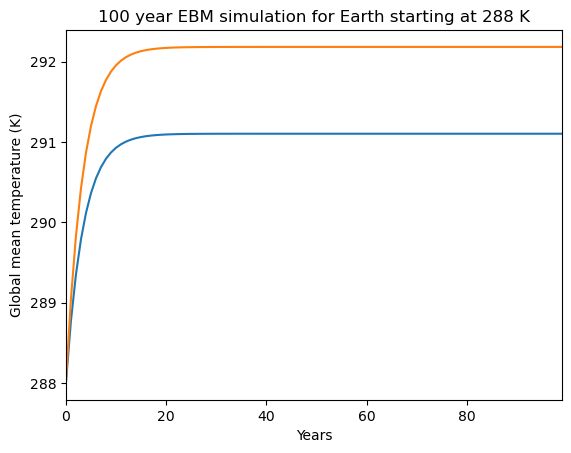

In [10]:
# define the time interval, currently one year expressed in seconds
dt = 60.0 * 60.0 * 24.0 * 365.0 # seconds in 1 year

# define albedo 
alpha = 0.32

# define emissivity
emiss = 0.57

# define solar insolation
Q = 341.3

# define number steps (e.g. number of years)
numsteps = 99 # 100 year run

# dfine starting temperature
T0 = 288 # K

# define CO2 scenarios
# 1. constant CO2 at PI levels
CO2_scenario_1 = np.full(numsteps+1,280)
# 2. constant CO2 at twice PI levels
CO2_scenario_2 = np.full(numsteps+1,280*2)

# run the experiment
Years_sc1, Tsteps_sc1 = run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss,CO2_scenario_1, dt, numsteps,T0)
Years_sc2, Tsteps_sc2 = run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss,CO2_scenario_2, dt, numsteps,T0)

# make a simple plot the results
plt.plot(Years_sc1, Tsteps_sc1, label='Scenario 1')
plt.plot(Years_sc2, Tsteps_sc2, label='Scenario 2')
plt.xlim(0,numsteps)
#plt.ylim(np.floor(np.min(Tsteps)), np.ceil(np.max(Tsteps)))
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)')
plt.title(f"{numsteps+1} year EBM simulation for Earth starting at {T0} K")

In [11]:
def extract_rcp_co2_scenarios():
    """ here we use the loadtxt method in numpy to read in co2 forcing data. The original data runs
    between the years 1950 and 2500. We will truncate these time series to run between 1950 and
    2100 for our experiments.
    """
    # read the data files using numpy.loadtxt. The data files contain 2 columns with 551 data points in each
    # column. By adding the transpose method, i.e. numpy.loadtxt(<filename>).T we change the dimensionscan from
    # (551,2) to (2,551), allowing us to asssign each column to a variable
    years_rcp26, co2_rcp26 = np.loadtxt("ipcc.scenario.rcp26.forcing.txt").T
    years_rcp45, co2_rcp45 = np.loadtxt("ipcc.scenario.rcp45.forcing.txt").T
    years_rcp6, co2_rcp6 = np.loadtxt("ipcc.scenario.rcp6.forcing.txt").T
    years_rcp85, co2_rcp85 = np.loadtxt("ipcc.scenario.rcp85.forcing.txt").T

    # select the time period we want
    find = np.where((years_rcp26 >= 1950)&(years_rcp26 <=2100))

    # truncate variables to specified time range
    years = years_rcp26[find]
    co2_rcp26 = co2_rcp26[find]
    co2_rcp45 = co2_rcp45[find]
    co2_rcp6 = co2_rcp6[find]
    co2_rcp85 = co2_rcp85[find]

    # return variables
    return years, co2_rcp26, co2_rcp45, co2_rcp6, co2_rcp85

In [12]:
years, co2_rcp26, co2_rcp45, co2_rcp6, co2_rcp85 = extract_rcp_co2_scenarios()

FileNotFoundError: ipcc.scenario.rcp26.forcing.txt not found.

In [ ]:
"""
colours we are using for the following plots based on the IPCC
18	AR5-RCP-2.6	#0000FF
19	AR5-RCP-4.5	#79BCFF
20	AR5-RCP-6.0	#FF822D
21	AR5-RCP-8.5	#FF0000
"""
plt.figure(figsize=(5,3),dpi=300)
plt.plot(years, co2_rcp26, color="#0000FF", label = "RCP2.6")
plt.plot(years, co2_rcp45, color="#79BCFF", label = "RCP4.5")
plt.plot(years, co2_rcp6, color="#FF822D", label = "RCP6.0")
plt.plot(years, co2_rcp85, color="#FF0000", label = "RCP8.5")
plt.xlim(1950, 2100)
plt.xlabel("Year")
plt.ylim(0,1400)
plt.ylabel("CO2 Concentration (ppmv)") 
plt.legend(loc=2)
plt.title("IPCC AR5 Representative\n Concentration Pathways (RCP)")
plt.tight_layout()

In [ ]:
# define the time interval, currently one year expressed in seconds
dt = 60.0 * 60.0 * 24.0 * 365.0 # seconds in 1 year

# number of years
nyears = years.size

# define albedo 
alpha = 0.32

# define emissivity
emiss = 0.57

# define solar insolation
Q = 341.3

# define number steps (e.g. number of years)
numsteps = nyears-1

# dfine starting temperature
T0 = 288 # K

# run the experiment
CO2_scenario_1 = np.full(numsteps+1,280)
Years_orig, Tsteps_orig = run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss,CO2_scenario_1, dt, numsteps,T0)

Years_sc1, Tsteps_sc1 = run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss,co2_rcp26, dt, numsteps,T0)
Years_sc2, Tsteps_sc2 = run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss,co2_rcp45, dt, numsteps,T0)
Years_sc3, Tsteps_sc3 = run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss,co2_rcp6, dt, numsteps,T0)
Years_sc4, Tsteps_sc4 = run_time_dependent_zero_dim_ebm_V2(Q, alpha, emiss,co2_rcp85, dt, numsteps,T0)


plt.figure(figsize=(5,3.5),dpi=300)
# make a simple plot the results
plt.plot(years, Tsteps_orig, "--k", label = "280 ppmv")
plt.plot(years, Tsteps_sc1, color="#0000FF", label = "RCP2.6")
plt.plot(years, Tsteps_sc2, color="#79BCFF", label = "RCP4.5")
plt.plot(years, Tsteps_sc3, color="#FF822D", label = "RCP6.0")
plt.plot(years, Tsteps_sc4, color="#FF0000", label = "RCP8.5")
plt.ylim(288,294)
plt.xlim(1950, 2100)
plt.xlabel("Year")
plt.ylabel('Global mean temperature (K)')
plt.legend(loc=2,ncols=2)
plt.title(f"{numsteps+1} year EBM simulation for Earth\n starting at {T0} K")
plt.tight_layout()

# Computer Workshop 2, Exersise 2

#### Exersise Objectives:
1. Introduce you to the Advanced Very High Resolution Radiometer (AVHRR) instrument series.
2. Review topic of reflectance and how we can use it to monitor plant health from space.
3. Build a simple workflow to read in satellite reflectance measurements and calculate Normalized Difference Vegetation Index (NDVI).
4. Discuss the results.

#### Python Libraries
For this exersises we will work with the following python libraries:
1. **NumPy** (https://numpy.org/): _"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much .
2. **Matplotlib** (https://matplotlib.org/): _"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible"_. We will use this library to visualise the contents of data files and the results from the analyses we perform on these data.
3. **NetCDF4** (https://unidata.github.io/netcdf4-python/): The Network Common Data Form (NetCDF) is specific scientific data format used in climate and earth observation sciences. Each variable is stored in a compressed format along with accompanying meta data. The majority of data you will use in this course wil be stored in this format.
  

# 2. Observing the Surface at Visible Wavelengths
Most common way people engage with satellite observations is through imagery, especially visible imagery (RGB). The example below is an image of the Univeristy taken from one of Planet Labs Dove satellites. On the left you can see the three red, green and blue channels captured by the satellite. When put them together we get a visible image we are more familiar with looking at.

![university rgb](img/UoL_RGB.png)

While we tend to the red, green and blue sensitive channels to create an image much like the cameras on our phones do, we can exploit features in the Earths reflectance at different wavelengths to understand properties of the surface. 

![reflectance spectra example image](img/reflectance_example_plot.png)

This example shows us average measured reflectance spectra for trees and grass land environments as part of the NASA's ECCOSTRESS mission (https://ecostress.jpl.nasa.gov/) currently fly on board the International Space Station (ISS). What we observe is a sharp gradient around 700 nm, terminating by 800 nm. This is known as the red edge and can be used measure properties plant health. The example below illustrates this concept by showing the relative response of reflected light for four broad channels blue, green, red, and near-infrared (NIR). If we focus purely on the red and NIR arrows, we can see that for a healthy plant (right-hand image) the difference is large i.e. the red edge feature we just observed in the previous figure. If plants become stressed or die off we can see the relationship between red and NIR bands changes, which result in a diminishing of the red edge gradient (or flattening of the refectance spectra).   

![leaf reflectance examples 4 band](img/vis_band_reflectance_leaf_example.png)

## 2.1 Normalized Difference Vegetation Index (NDVI)
The method we will be looking at today to infer plant health was first proposed by Kreigler, et al. (1969) and later followed up by Rouse et al. (1973) to exploit new measuremenmts from the Landsat 1 mission, and is known as the Normalized Difference Vegetation Index (NDVI). This simple method uses spectral channels on the satellite to provide a measure of the red edge gradient which can be related back to the health of the plant. It works by normalising green leaf scattering in Near Infra-red wavelengths with chlorophyll absorption in red wavelengths. Therefore we calculate NDVI using the following relationship:

### $NDVI = \frac{(NIR-RED)}{NIR+RED}$

Here RED and NIR relate to spectral channels or bands of the satellite instrument, and we get values for NDVI ranging between -1 and 1. Lets apply this algorithm to the Planet data we just saw above.

![ndvi example over campus](img/NDVI_over_UoL.png)

Looking at this image we can see alot of detail, the areas with vegetation show up brightly, while buildings and other urban parts are darker. What other features can you see?

- Shadows?
- Evidence of sports?
- Water?

**So how do we make inferences from the data relating to plant health?**

### 2.1.1 NDVI Values


![ndvi values](img/ndvi_concept_v2.png)

As previously mentioned NDVI values range from -1 to +1 where:
- higher NDVI values indicate greater photosynthetic activity, meaning healthier vegetation,
- lower values suggest less vegetation cover or stressed conditions.
  
The table below provides some information on how the values can be interpreted:

| NDVI Value Range  | Land Cover Type & Interpretation |
|-------------------|---------------------------------|
| **< 0.0**        | Water bodies, snow, ice, or clouds (high absorption, low reflectance in NIR and RED). |
| **0.0 – 0.1**    | Barren land, sand, or urban/built-up areas (minimal vegetation). |
| **0.1 – 0.2**    | Sparse vegetation, dry grasslands, or degraded areas. |
| **0.2 – 0.4**    | Shrublands, agricultural fields, or moderately healthy grasslands. |
| **0.4 – 0.6**    | Moderate vegetation cover, croplands, or regenerating forests. |
| **0.6 – 0.8**    | Dense vegetation, healthy forests, and well-irrigated croplands. |
| **0.8 – 1.0**    | Very dense, highly productive vegetation (tropical rainforests, peak-growing season crops). |


It is worth noting that negative values can also be found for barren areas or regions where vegetation has died off, expecially when using spatially high resolution data either from a drone or satellite. These surfaces will share the same properties where we would observe high absorption and low reflectance. For further details on NDVI you can refer to the recent review paper by Huang, et al., (2021).

### References:
Kriegler FJ, Malila WA, Nalepka RF, Richardson W (1969) Preprocessing transformations and their effect on multispectral recognition. Remote Sens Environ VI:97–132

Huang, S., Tang, L., Hupy, J.P., Wang, Y. and Shao, G., 2021. A commentary review on the use of normalized difference vegetation index (NDVI) in the era of popular remote sensing. Journal of Forestry Research, 32(1), pp.1-6.

Rouse Jr, J.W., Haas, R.H., Schell, J.A. and Deering, D.W., 1973. Monitoring the vernal advancement and retrogradation (green wave effect) of natural vegetation (No. NASA-CR-132982).

## 2.2 Applying the NDVI Algorithm to the Advanced Very High Resolution Radiometer (AVHRR) Instrument
The Advanced Very High Resolution Radiometer (AVHRR) is a spaceborne sensor on NOAA and EUMETSAT polar-orbiting satellites, used for global environmental monitoring. It captures multispectral data (visible to thermal infrared) with 1.1 km resolution and a 2,400 km swath, enabling frequent observations. AVHRR supports weather forecasting, climate studies, vegetation mapping (NDVI), sea surface temperature monitoring, wildfire detection, and ice tracking. Despite moderate resolution and limited spectral bands, its long-term data record (since the late 1970s) makes it vital for climate research and large-scale Earth observations.

| Channel  | Wavelength (µm)    | Description |
|----------|-------------------|-------------|
| **1 (VIS)**  | 0.58–0.68  | Measures reflected solar radiation; used for cloud, aerosol, and vegetation monitoring. |
| **2 (NIR)**  | 0.725–1.00 | Detects vegetation health (NDVI) and land cover changes. |
| **3A (SWIR)** | 1.58–1.64  | Used for snow and ice discrimination (daytime). |
| **3B (MIR)** | 3.55–3.93  | Fire detection, cloud analysis, and nighttime imaging. |
| **4 (TIR)**  | 10.3–11.0 | Measures thermal radiation for sea surface temperature (SST), cloud-top temperatures, and land surface temperature. |
| **5 (TIR)**  | 11.5–12.5 | Used for atmospheric sounding, water vapor detection, and improved SST accuracy. |


For this exersise we will be using channels 1 and 2 from the AVHRR instrument that flew on board the Metop-A satellite between 2007 and 2021. The first thing we need to do is understand what will be looking at when working with the data. Below is the figure we looked at before in reference to reflectance spectra, with two new sets of dashed lines added. The lines represent the **Spectral Response Function** (SRF) for channel 1 (VIS) and channel 2 (NIR) respectively. What the SRFs tell us is how the higher resolution signal we would observe in the reflectance spectra is integrated by the spectral channel on the satellite.  

![reflectance spectra example image](img/reflectance_example_plot_with_srfs.png)

## 2.2 Lets quickly review our workflow steps

Previously we looked at this simple flow diagram when we were thinking about how we would put together our work flow for processing and analysisng data with Python in the Jupyter environment.

![work flow overview](img/basic_workflow_cw2_pa260x.png)

### **step 1: Collect some data**
The following file has been prepared that contains 10 days of gridded AVHRR observation between 6$^{th}$ to 15$^{th}$ of June 2015. For the puposes teh data has been processed onto a regular 0.2$^{\circ}$ x 0.2$^{\circ}$ grid.

In [13]:
filename = "datasets/metop_2_avhrr_ch1_ch2_daily_refectances_20150606_20150615.nc"

### step 2: Read the data into memory
For this step we will reuse the <span style="color:blue">**read_gridded_data()**</span> function from workshop 1, we only need top load the netCDF4 library as numpy and matplotlib are all ready loaded from exersise 1. 


In [16]:
# load netCDF4 library
import netCDF4

In [17]:
# this function has just be cut and paste from workshop 1. Writing more generic functions is more time consuming in the 
# short term, but allows greater reuse in the long run 
def read_gridded_data(filename, report=True):
    """ function to read regular gridded data files and return a Python dictionary.
    inputs: filename -> name of file to be read
            report   -> boolean flag, if true then a table listing the file contents is printed to screen

    outputs: data    -> a python dictionary containing the file contents
    """
    # open the file and map the contents to a netCDF object. Use a test to capture
    # any issues with the data file
    try:
        nc = netCDF4.Dataset(filename,"r")
    except IOError:
        raise
    # if report is set to true then prind global attributes
    if report == True:
        print(f"Global Attributes For File: {filename}") # when witing strings, starting them with an 'f' allows you to insert other variables using {}.
        print("----------------------------------------------------------------------------------------------------")
        print(nc)
    # Define a dictionary to hold the contents
    data = {} 
    # loop over the file contents and write
    if report == True:
        # what variables are in this file?
        # printing Aligned Header 
        print("-------------------------------------------------------------------")        
        print(f"{'Variable Name' : <14} |{'Long Name':<32} |{'tdim, ydim, xdim':>17}") 
        print("-------------------------------------------------------------------")
    else:
        pass # we add a pass so we can close this if statement with an else

    for varname in nc.variables.keys():
        if report == True:
            print(f"{varname:<14} |{nc[varname].long_name:<32} |{', '.join([str(d) for d in nc[varname].shape]):>17}")
        else:
            pass
        # write the variable to the dictionary
        data[varname] = nc[varname][:] #  the [:] at the end indexes all the data
    
    # finally close the file
    nc.close()

    # return the filled data dictionary
    return data

In [18]:
# read in the AVHRR data and print the contents information to screen, we set report to True so that we get details on the file contents
avhrr_data = read_gridded_data(filename, report=True)

Global Attributes For File: datasets/metop_2_avhrr_ch1_ch2_daily_refectances_20150606_20150615.nc
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Daily gridded AVHRR (MetOp A) CH1 and CH2 raflectances
    Conventions: CF-1.5
    Metadata_Conventions: Unidata Dataset Discovery v2.0
    id: 
    product_version: v1.0
    institution: UoL
    creator_url: http://www.le.ac.uk
    creator_email: t.trent@le.ac.uk
    time_coverage_start: 2015-06-06
    time_coverage_stop: 2015-06-15
    geospatial_lat_units: degrees_north
    geospatial_lat_resolution: 0.2
    geospatial_lat_min: -90
    geospatial_lat_max: 90
    geospatial_lon_units: degrees_east
    geospatial_lon_resolution: 0.2
    geospatial_lon_min: -180
    geospatial_lon_max: 180
    comment: PA2602/PA2605/PA2606 Computer Workshop 2, Exersise 2
    date_created: 2025-01-30 13:37:10.120

### step 3: apply some processes
Below we can see the three functions we will use to analyse the data. The first you shoudld recognise as the equation saw earlier to calculate NDVI. The other two we will cover later on. 

In [19]:
def calc_ndvi(red,nir):
    """ calculate the Normalized Difference Vegetation Index (NDVI). Note NDVI is an index value and is therefore unitless.
    Inputs: red -> visible reflectance or radiance spectral band information
            nir -> near-infrared reflectance or radiance spectral band information

    outputs: ndvi -> Normalized Difference Vegetation Index (values between -1 to 1)
    """
    return (nir-red)/(nir+red)

In [20]:
def create_rgb(ch1, ch2):
    """ create an rgb array from AVHRR VIS nad NIR channels fo r use in a false colour image. 
    Inputs: ch1 -> AVHRR visible reflectance or radiance spectral band information
            ch2 -> AVHRR near-infrared reflectance or radiance spectral band information

    Outputs: rgb -> array(ydim, xdim, 3) with missing values replaced with NaNs
    """
    # extract dimension information
    dims = ch1.shape
    
    # define rgb array to hold data
    rgb = np.full((dims[0], dims[1], 3),np.nan)
   
    # assign channel data to each rgb band, removing any mask with the .data method
    rgb[:,:,0] = ch2.data
    rgb[:,:,1] = ch2.data
    rgb[:,:,2] = ch1.data
    
    # find and replace default missing values with NaN
    find = np.where(rgb == 1e20)
    rgb[find] = np.nan
    
    # return rgb array
    return rgb

In [21]:
def simple_cloud_mask(ch1, ch2, hist_thresh=0):
    """ create a simple cloud mask based on rgb values. The assumption here is that for cloudy grid 
    cells the rgb values will be almost identical so there should be very little variability between them
    e.g. the standard deviation is close to 0.
    Inputs: ch1         -> AVHRR visible reflectance or radiance spectral band information
            ch2         -> AVHRR near-infrared reflectance or radiance spectral band information
            hist_thresh -> Threshold value used to filter cloudy grid cells based off a histogram distribution

    Outputs: cldmask    -> 2d array (ydim, xdim) of boolean values (e.g. True of False), where grid cells flagged as cloudy are set to True 
    """
    # create an rgb array from AVHRR channel information
    rgb = create_rgb(ch1, ch2)
    
    # calculate the standard deviation between thge r, g, and b values for each grid cell (axis=2 keyword does this for us in 1 operation). We use the
    # numpy.nanstd function as we have NaN values in our grid where data is missing
    rgb_std = np.nanstd(rgb,axis=2)
    
    # create a mask for the cloud using a set of logic statements. The pipe symbol between parentheses '..)|(..' is the equivilent of '..) or (..'
    # essentially we are saying a grid cell is bad if statement 1 or statement 2 is true
    cldmask = (rgb_std < hist_thresh)|(np.isnan(rgb_std) == True)

    # return the cloud mask
    return cldmask

### step 4: Visulise results

#### Result 1: Initial look at the reflectance data
The first thing we normally want to do whenn we get any dataset is quickly visualise the data. Why do we do this?
- provide context (what are we actually woirking with)
- quickly see any spatial relationships or patterns
- check the values and/or units
- is there any missing data?

Lets write a simple piece of code to plot the AVHRR refectance data &#x1F447;

Text(0.5, 1.0, 'Reflectance AVHRR Channel 1: day 1')

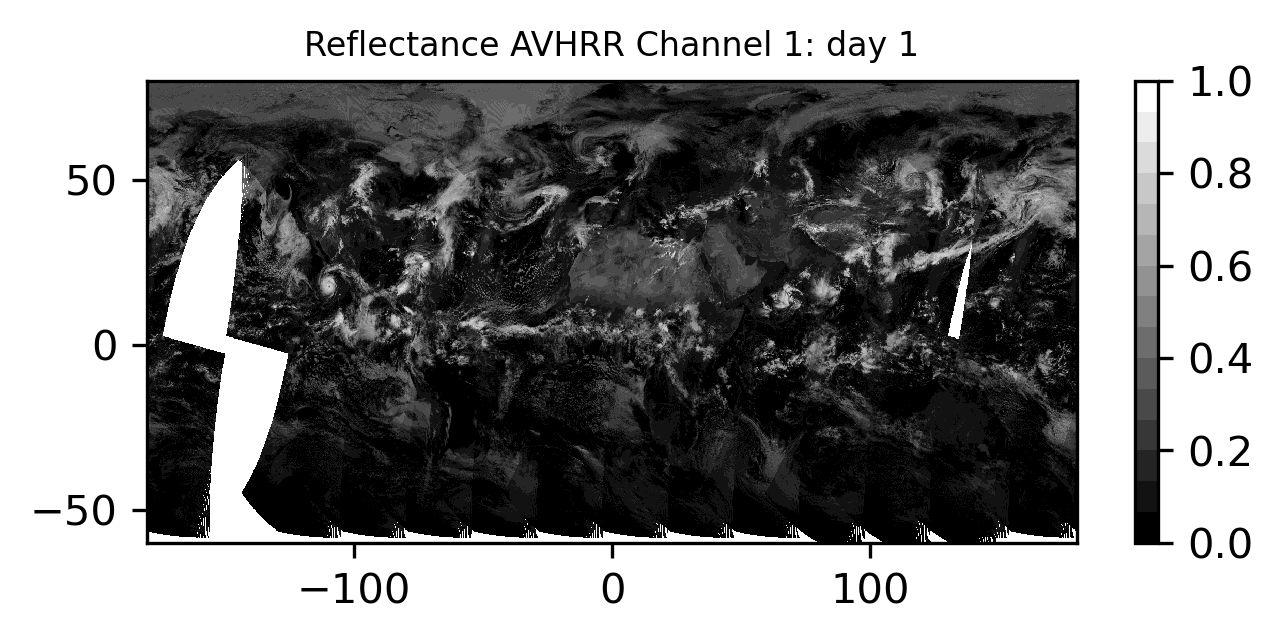

In [30]:
# first we define the size of figure we are going to plot. The figsize variable does this for us and then we use the dpi
# (dots per square inch) to determine the quality of the image. AS default of 300 is always a good starting point as this 
# is usually the minimum for publications.  
plt.figure(figsize=(5,2),dpi=300)

# We the create a variable called day. This represents the index value for the time dimension in our data. Remember, Python 
# counts from 0, not 1 so day 1 would be index 0, and day 10 would be index 9
day = 0

# we create another variable to select the channel we want to plot. Opions are 1 or 2
chan = 1

# we then use the pcolormesh method to plot our gridded data. For the x, and y coordinates we use the lon_bnds and lat_bnds 
# variables as these give the corners of each grid cell, e.g. array sizes = lon_bnd(xdim+1), lat_bnds(ydim+1). We then use our day
# index value to select the 2D gridded data we want to display, e.g. avhrr_data['Ch2'][day,:,:] => grid(ydim, xdim). Because we know 
# that the reflectances will range between 0 and 1 we set the min and max values to match. Finally, we specify the colormap (cmap) from 
# the list of thoise supplied with MatplotLib, e.g. binary_r => where the _r means we have reversed the order of the colours. The command 
# plt.get_cmap() tells pcolormesh what colormap we are using and how many intervals we want (max 255).
plt.pcolormesh(avhrr_data['lon_bnds'], avhrr_data['lat_bnds'], avhrr_data[f"Ch{chan}"][day,:,:],
               vmin=0,vmax=1.0,cmap=plt.get_cmap('binary_r',15))

# we add a colour bar to help interpret the data we see
plt.colorbar()

# finally, we add a title. The syntax f" some text " are know as f-strings. These allow you to insert other variables into strings
# you want to write onto a plot, print to screen or insert into a filename. The variable is surrounded with braces {}, which also 
# contain additional formatting inromation
plt.title(f"Reflectance AVHRR Channel {chan}: day {day+1}",fontsize=8)

What can you see in the data? 
- land mass
- clouds
- water bodies
- missing data
  
What happens when you change the day index number? Does the data look the same?

What wavelength are we looking at? Try changing the channel and see how it differs.

#### Result 2: Lets have a go at calculating NDVI
Lets do a similar exersise to the one we have just done, but this time we will calculate NDVI and plot that instead of the refelctances. Remember, for AVHRR NDVI is calculated using:

### $NDVI = \frac{(Ch2(NIR) - Ch1(VIS))}{(Ch2(NIR) + Ch1(VIS))}$

We already have a function to calculate the NDVI written (<span style="color:blue">**calc_ndvi()**</span>) so we can now write a short piece of code to have a quick look at the NDVI &#x1F447;

Text(0.5, 1.0, 'AVHRR NDVI: day 1')

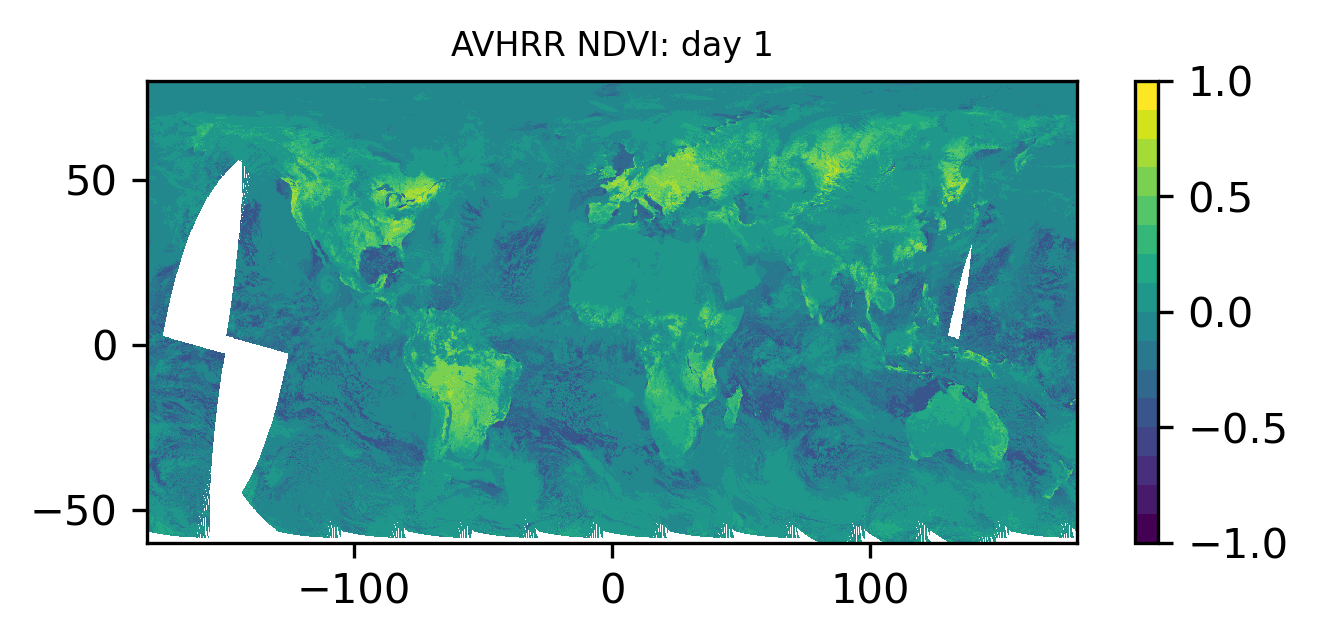

In [33]:
# first we define the size of figure we are going to plot. The figsize variable does this for us and then we use the dpi
# (dots per square inch) to determine the quality of the image. AS default of 300 is always a good starting point as this 
# is usually the minimum for publications.  
plt.figure(figsize=(5,2),dpi=300)

# next we calculate NDVI, we will use the day index number from the previous cell to index the reflectance 
# data we want to use in our calculation. We pass the data for channels 1 and 2 in to the calc_ndvi function
ndvi = calc_ndvi(avhrr_data['Ch1'][day,:,:], avhrr_data['Ch2'][day,:,:])

# we now have a 2d variable called ndvi, lets plot it in the same way using pcolormesh. Note: now our min-max range
# has changed to -1 to +1. We willl also use a different colormap
plt.pcolormesh(avhrr_data['lon_bnds'], avhrr_data['lat_bnds'], ndvi,vmin=-1,vmax=1,cmap=plt.get_cmap('viridis',16))

# we add a colour bar to help interpret the data we see
plt.colorbar()

# finally, we add a title. The syntax f" some text " are know as f-strings. These allow you to insert other variables into strings
# you want to write onto a plot, print to screen or insert into a filename. The variable is surrounded with braces {}, which also 
# contain additional formatting inromation
plt.title(f"AVHRR NDVI: day {day+1}",fontsize=8)

# heres another small test we can do. By selecting the range on the axis we can zoom into a region.
# To look closer over the UK and Europe uncomment the following two lines and rerun.
#plt.xlim(-10,40)
#plt.ylim(35,70)

Lets look again at the data as NDVI values, what can you see in the data? 
- land mass?
- clouds?
- water bodies?
- missing data?
  
What happens when you zoom into an area? Go back to the previous piece of code and uncomment the last two lines. What is our biggest challenge when trying to create maps of NDVI?

#### Result 3: Building a simple cloud mask
As we can see from our first attemp at calculating NDVI we have a lot of cloud contamination. This is the reality when working with satellite data at wavelengths the ultraviolet (UV) to the far infrared (FIR), unless we want to study clouds we need to remove them from the data. Now cloud miccro physics is a large and complex topic, and beyond the scope of this course. However, can we use optical properties from AVHRR to create a simple cloud mask so grid cells that contain cloud can be removed?

##### lets start by creating a false colour image.
Unlike natural-colour (also called true-colour) images which use red, green, and blue wavelengths, false-colour images use at least one wavelength outside the visible range, or some other type of data. With AVHRR we only have the two channels so can use them to create a false colour image and see whether there is information we can exploit. We start by creating a 3d array using the <span style="color:blue">**create_rgb()**</span> function we defined earlier, passing channel 1 and 2 data for the previously defined day number index &#x1F447;

In [34]:
# create an rgb array where r = NIR, g=NIR, and b= VIS 
rgb = create_rgb(avhrr_data['Ch1'][day,:,:],avhrr_data['Ch2'][day,:,:])

now we use the <span style="color:blue">**imshow()**</span> method in Matplotlib to display our false colour image. The function will take the r,g,b information for each grid cell and convert it into a colour &#x1F447;

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00139999995008111..1.0000000200408773e+20].


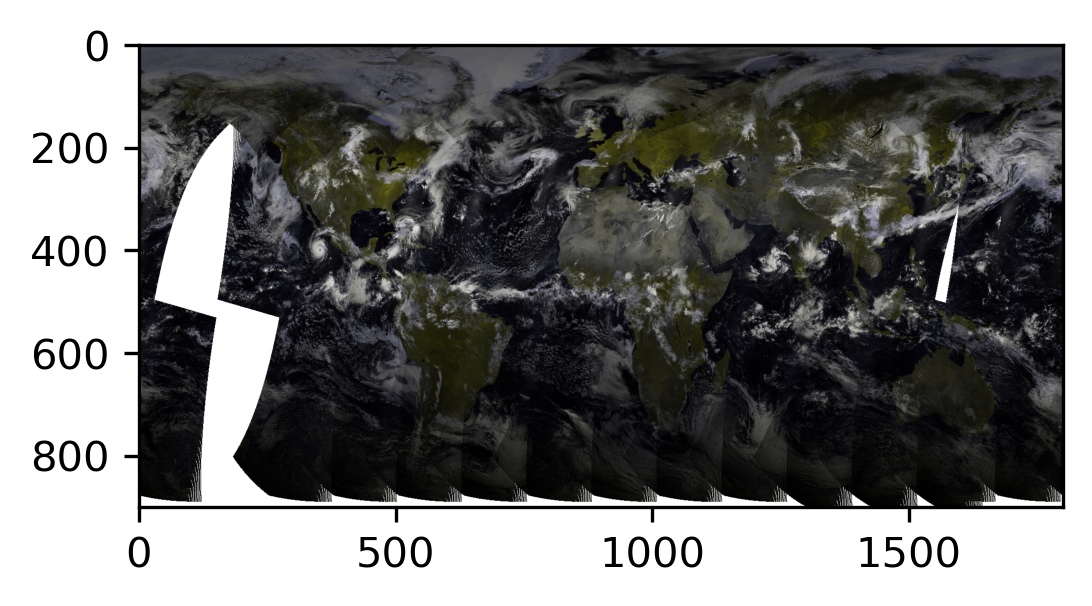

In [64]:
# first we define the size of figure we are going to plot. The figsize variable does this for us and then we use the dpi
# (dots per square inch) to determine the quality of the image. AS default of 300 is always a good starting point as this 
# is usually the minimum for publications
plt.figure(figsize=(5,2),dpi=300)

# plot the flase colour image. We need to flip the image upside down so the orientation is the correct way around. This is 
# because imshow() will use the x and y index values to dictate the orientation. Therefore, we use the numpy method flipud()
# to flip the image. You will also notice we don't give it any longitude or latitude information.
plt.imshow(np.flipud(rgb))

Lets look now at the false colour image, what can you see in the data? 
- land mass?
- clouds?
- water bodies?
- missing data?
  
##### So how do we use this infomation to create a cloud mask?
what we can see in this image is that clouds and ice/snow covered areas are white, the land is green, the ocean dark blue etc. When we work with RGB values to create colours, a colour scale that went from black-grey-white would have the same value for r,g, and b. Therefore, we should be able to indentify white colour by looking at grid cells where the standard deviation between the RGB values is very close to zero. 

So lets visulaise by plotting a histogram of the RGB standard deviation values &#x1F447;

First we want create a 1D variable with just the valid standard deviation values (i.e. no NaNs). We are going to do all of 
this in 1 line of code, so lets break down the steps:
1. We use the numpy.nanstd() funtion to calculate the values we are interested in. Because our data is 3d 
(ydim,xdim,3), we will want to apply the method along the 3rd dimesion to giver a 2d variable (ydim,xdim).
2. Now we need to take into account any NaN values, we use another method in numpy from the masked array (ma)
class called masked_invalid (np.ma.masked_invalid). What this does is masks any NaN values so we can operate
on the variable without the NaNs being used or counted.
3. When we have masked variables they inherit another method called compressed -> np.ma.masked_invalid().compressed(). This action
   will have the effect of removing all the masked values and collapsing the masked array from its 2d sate to 1d. We can then use this
   new variable to plot our histogram.    


In [36]:
# create our 1d array of rgb sttdev values.
x = np.ma.masked_invalid(np.nanstd(rgb,axis=2)).compressed()

(0.0, 225027.00000000003)

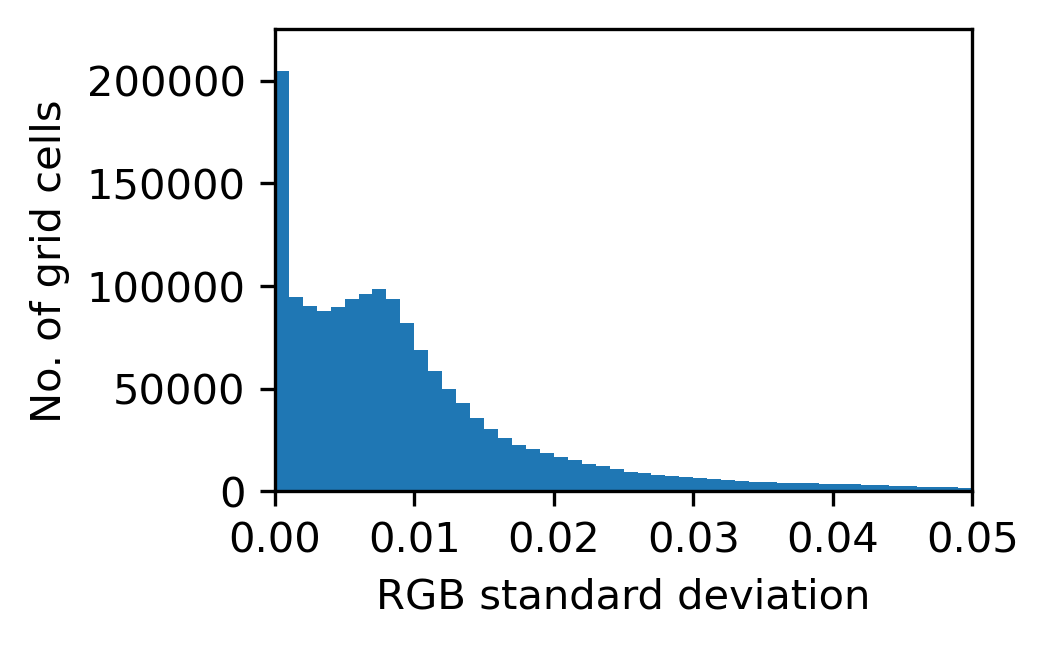

In [62]:
# first we define the size of figure we are going to plot. The figsize variable does this for us and then we use the dpi
# (dots per square inch) to determine the quality of the image. AS default of 300 is always a good starting point as this 
# is usually the minimum for publications
plt.figure(figsize=(3,2),dpi=300)

# next we plot the histogram, binning the data at intervals of 0.001 between 0 and 0.1
tmp = plt.hist(x,bins=100,range=(0,0.1))

# add some axis labels
plt.ylabel("No. of grid cells",fontsize=10)
plt.xlabel("RGB standard deviation",fontsize=10)

# define the range for the x axis
plt.xlim(0,0.05)

# define the range for the y axis based off the maximum value
plt.ylim(0, tmp[0].max()*1.1)

So we can see that we get a skewed, bi-modal, long tailed distribution. The very low values on the left hand side of the plot are the ones we are going to assume correspond to the 'white' grid cells in our false color image. With this in mind we will assume everything lower than 0.005 is cloud/ice/snow.

If we remove cloudy data then we will have gaps in our previous image. One way around this is to average data together, which in our case will be over 10 days (sometimes reffered to as a decad). Therefore, we will need to write another short piece of code to:
1. loop over each day
2. filter for cloudy pixels, we already have a funtion for this <span style="color:blue">**simple_cloud_mask()**</span>
3. calculate NDVI
4. average NDVI over the 10 days and plot the result

One additional data quality filter we apply can also come from the NDVI values themselves. If we recall from earlier, the table explaining how to interpret NDVI values put values below 0 to include cloudy data. Therefore we can use this as a second test when processing the data, lets begin &#x1F447; 

In [73]:
# first we create an array (np.full) to hold the NDVI data for all 10 days. We use the dimension information from the 
# AVHRR ch1 refelctances (avhrr_data['Ch1'].shape) and initialise every value as a NaN (np.nan)
ndvi_10day = np.full(avhrr_data['Ch1'].shape,np.nan)

# next we loop over each day, create a cloud mask, calculate NDVI, quality control the NDVI and store the result
for day in range(10):
    # calculate the cloud mask for specified day index
    cldmask = simple_cloud_mask(avhrr_data['Ch1'][day,:,:],
                                avhrr_data['Ch2'][day,:,:],
                                hist_thresh=0.005) # here we see the histogram threshold value we identifed

    # now calculate the NDVI for given day index and write the result to the array we have just defined
    ndvi_10day[day,:,:] = calc_ndvi(avhrr_data['Ch1'][day,:,:], avhrr_data['Ch2'][day,:,:])

    # now we create a mask for the NDVI based on what we just calculated. The test
    # we make is that we consider a grid cell 'bad' if the NDVI is less than 0 
    ndvi_mask = (ndvi_10day[day,:,:] < 0)

    # use the cloud mask to index the values we want to replace them with a NaNs
    ndvi_10day[day,:,:][cldmask == True] = np.nan

    # use the ndvi mask to index values and set them to -1. This should set all these grid cells as non-reflective (e.g. water bodies)
    ndvi_10day[day,:,:][ndvi_mask == True] = -1

#### finally we create a simple plot of the 10 day average

C:\Users\tjt11.UOL\AppData\Local\Temp\ipykernel_11656\461840070.py:8: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(avhrr_data['lon_bnds'], avhrr_data['lat_bnds'], np.nanmean(ndvi_10day,axis=0),


Text(0.5, 1.0, 'AVHRR 10 day average NDVI')

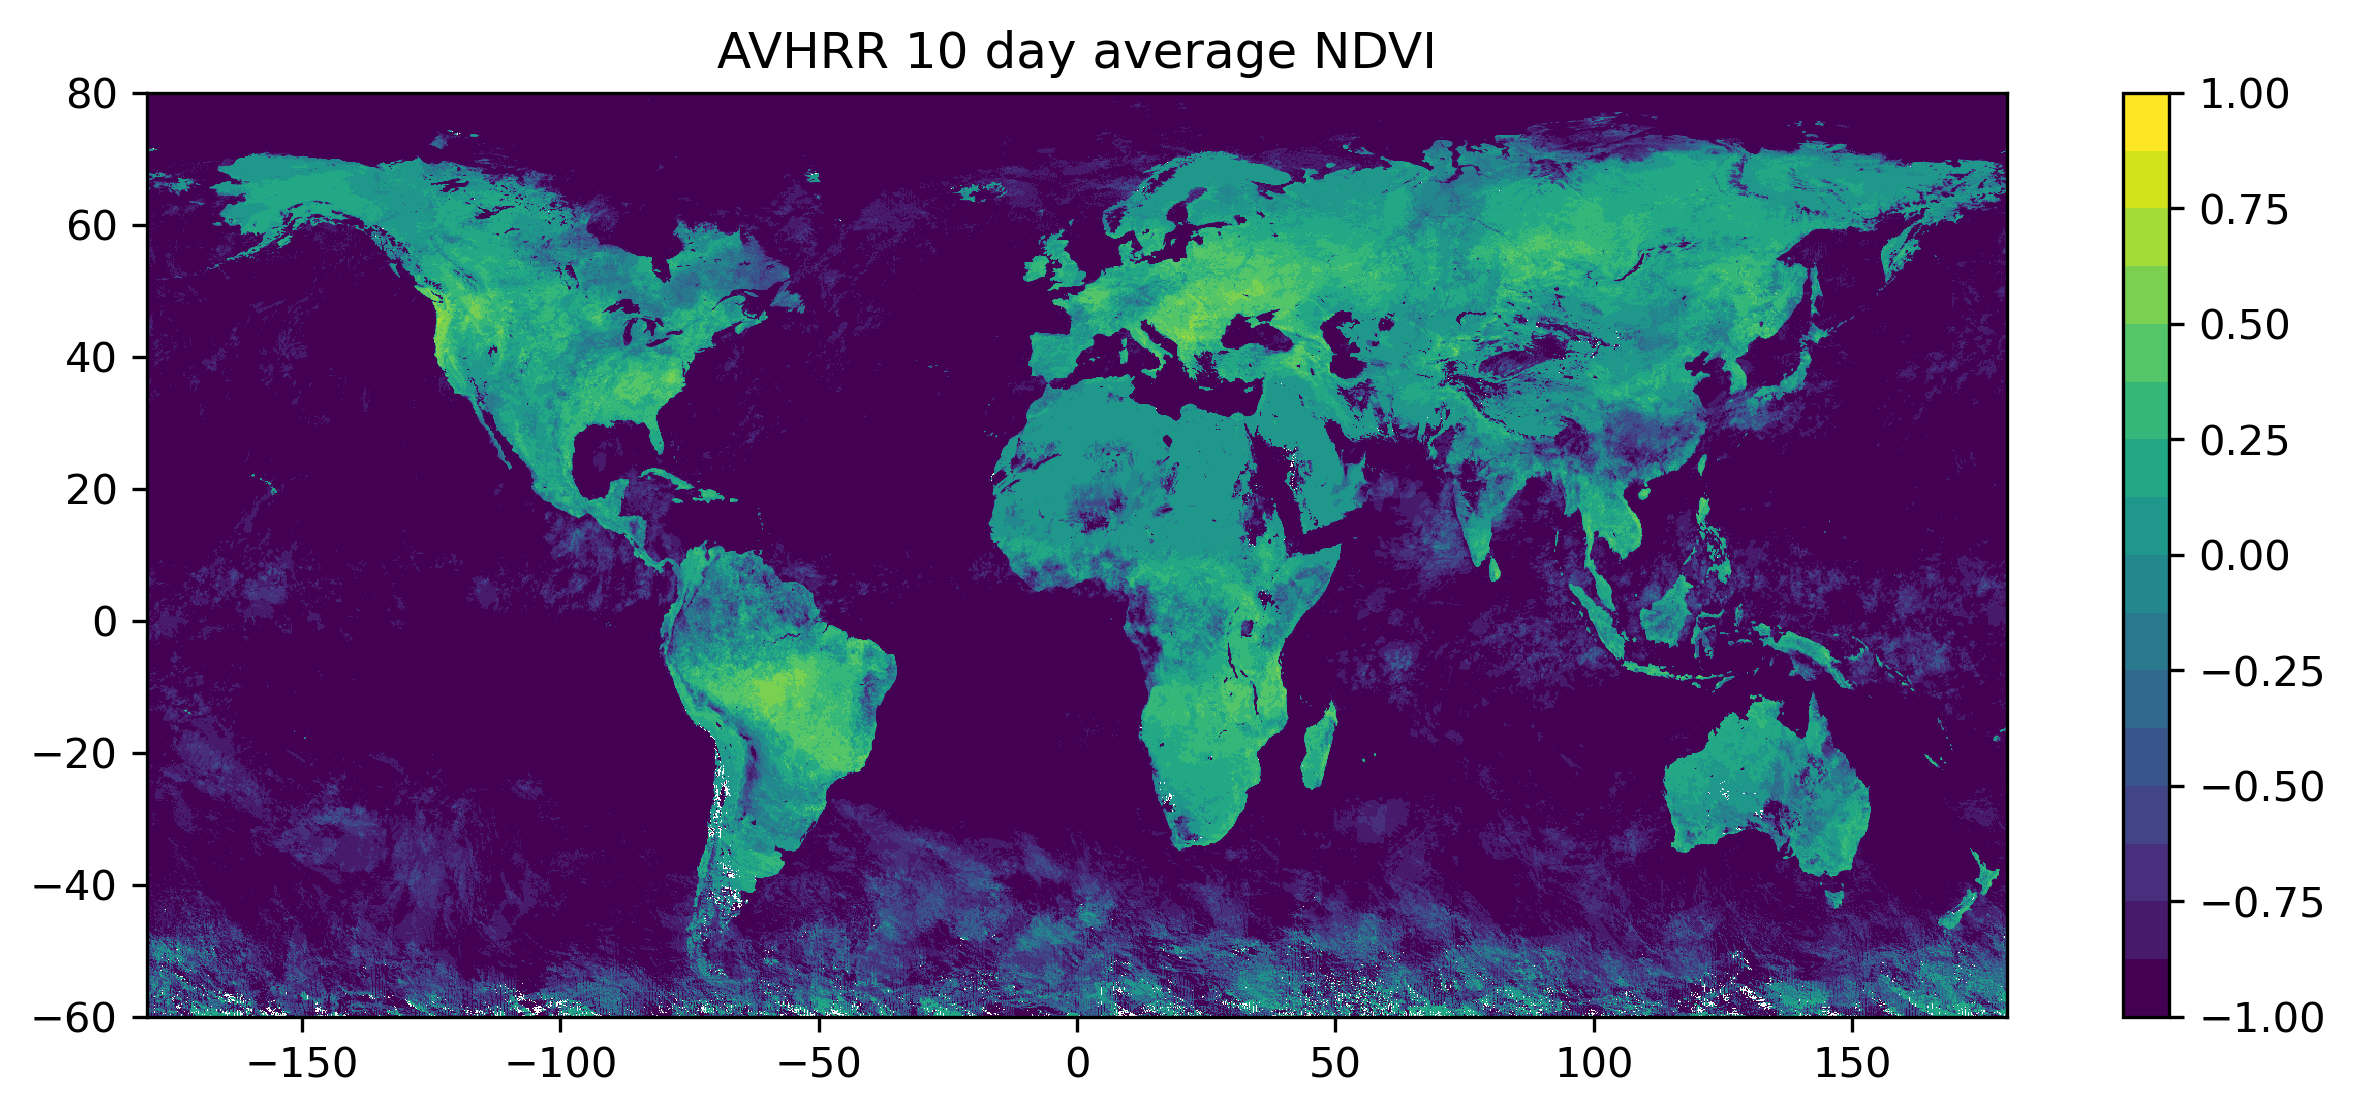

In [75]:
# first we define the size of figure we are going to plot. The figsize variable does this for us and then we use the dpi
# (dots per square inch) to determine the quality of the image. AS default of 300 is always a good starting point as this 
# is usually the minimum for publications
plt.figure(figsize=(10,4),dpi=300)

# we now have a 3d variable called ndvi_10day, lets calculate the mean by using np.nanmean() along the time dimension (axis=0) 
# and plot it in the same way using pcolormesh . Note: now our min-max range.
plt.pcolormesh(avhrr_data['lon_bnds'], avhrr_data['lat_bnds'], np.nanmean(ndvi_10day,axis=0),
               vmin=-1,vmax=1,cmap=plt.get_cmap('viridis',16))

# we add a colour bar to help interpret the data we see
plt.colorbar()


# finally add a title to the plot to describe what we looking at 
plt.title("AVHRR 10 day average NDVI")

For the final time lets look at out result. How does it compare to the first NDVI plot? What can you see in the data? 
- land mass?
- clouds?
- water bodies?
- missing data?
  
### So what can we infer about from the NDVI 10 day average? 
### Can we distinguish betwen area of higher plant health/greenness?
### What are the limitations of the data we have been using? 